In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothic')
df = pd.read_csv('data/jeju_card.csv')

In [29]:
print(df.info())
print()
print(df.describe(include='all'))
print()
print(df.isnull().sum())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19573 entries, 0 to 19572
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도명     19573 non-null  object
 1   시군구명    19573 non-null  object
 2   지역구분    19573 non-null  object
 3   업종명     19573 non-null  object
 4   이용자 구분  19573 non-null  object
 5   연령대     19573 non-null  object
 6   성별      19573 non-null  object
 7   연월      19573 non-null  object
 8   이용자수    19573 non-null  int64 
 9   이용횟수    19573 non-null  int64 
 10  이용금액    19573 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.6+ MB
None

          시도명   시군구명   지역구분    업종명  이용자 구분    연령대     성별       연월  \
count   19573  19573  19573  19573   19573  19573  19573    19573   
unique      1      2      2      8       2      7      2       28   
top       제주도    제주시     도심    식음료  내국인관광객    50대      남  2017-10   
freq    19573   9852   9858   2688    9807   3376   9795      738   
mean      NaN    NaN  

In [30]:
object_columns = df.columns[df.dtypes == 'object']
object_columns

for col in object_columns:
    print(col)
    print(df[col].unique(), '\n')

시도명
['제주도'] 

시군구명
['제주시' '서귀포시'] 

지역구분
['읍면' '도심'] 

업종명
['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통' '기타'] 

이용자 구분
['제주도민' '내국인관광객'] 

연령대
['60대이상' '50대' '40대' '30대' '20대미만' '20대' '20 미만'] 

성별
['여' '남'] 

연월
['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09'] 



In [31]:
df['연월'] = pd.to_datetime(df['연월'])
df_1718 = df[(df['연월'].dt.year == 2017) | (df['연월'].dt.year == 2018)]
df_1718.reset_index(inplace = True, drop=True)

In [32]:
df = df[df['업종명'] != '기타']
df = df[df['연월'].dt.year != 2016]
df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12-01,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12-01,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12-01,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12-01,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12-01,77,99,10021600
...,...,...,...,...,...,...,...,...,...,...,...
16702,제주도,서귀포시,도심,교통,내국인관광객,40대,남,2017-01-01,1891,2241,101651320
16703,제주도,서귀포시,도심,교통,내국인관광객,30대,여,2017-01-01,1033,1138,36637253
16704,제주도,서귀포시,도심,교통,내국인관광객,30대,남,2017-01-01,1570,1922,85201203
16705,제주도,서귀포시,도심,교통,내국인관광객,20대,여,2017-01-01,593,631,18802900


In [51]:
df.loc[df['연령대'] == '20 미만', '연령대'] = '20대미만'


In [33]:
df_year = df_1718.groupby('연월').sum(numeric_only=True)
df_year.reset_index(inplace = True)
df_year['연월'] = df_year['연월'].astype('str')
df_year['연월'] = df_year['연월'].str[:-3]

In [34]:
df_year

,연월,이용자수,이용횟수,이용금액
0,2017-01,2044697,3962878,158062633602
1,2017-02,1937989,3686906,142673272629
2,2017-03,2139087,4265024,158170622304
3,2017-04,2261037,4428571,164145266282
4,2017-05,2422539,4744952,174450463090
5,2017-06,2328383,4606602,166023890619
6,2017-07,2520117,5048178,177270011408
7,2017-08,2634037,5212389,178853518885
8,2017-09,2374142,4765159,168355520204
9,2017-10,2270758,4453613,164810287642


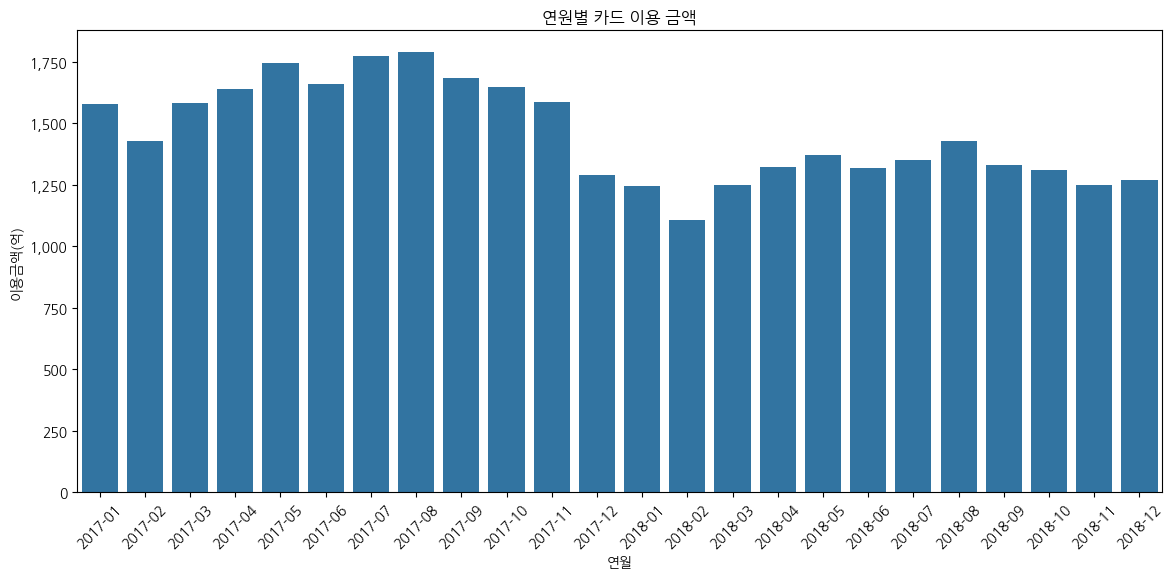

In [35]:
plt.figure(figsize = (14, 6))
sns.barplot(data=df_year, x='연월', y='이용금액', errorbar=None)
plt.xticks(rotation=45)
plt.title('연원별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')
plt.show()


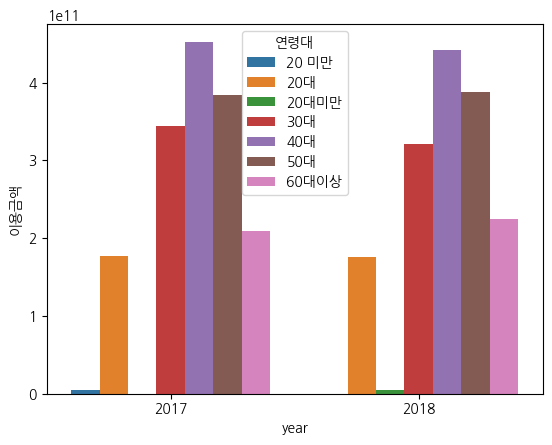

In [36]:
## 연령 - 년도별 이용 금액

df['year'] = df['연월'].dt.year
df_y_age = df.groupby(['year', '연령대']).sum(numeric_only=True).reset_index()
df_y_age = df_y_age[df_y_age['year'] != 2016].reset_index(drop=True)

sns.barplot(data=df_y_age, x='year', y='이용금액', hue='연령대')
plt.show()

In [37]:
df.head()

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,year
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12-01,23,29,4240100,2018
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12-01,114,190,27414000,2018
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12-01,52,71,6848000,2018
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12-01,259,458,91468500,2018
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12-01,77,99,10021600,2018


In [38]:
df['year'] = df['연월'].dt.year
df_y_u = df.groupby(['year', '이용자 구분']).sum(numeric_only=True).reset_index()
df_y_u = df_y_u[df_y_u['year'] != 2016].reset_index(drop=True)

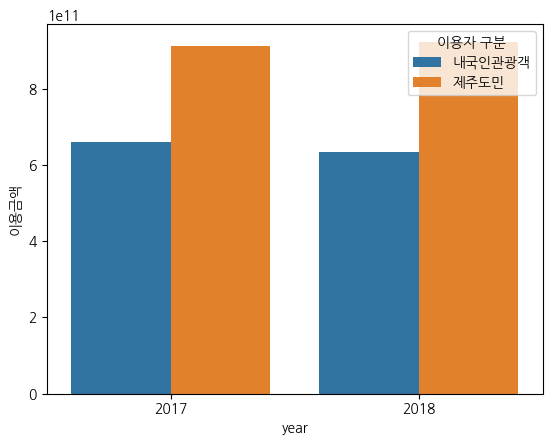

In [39]:
sns.barplot(data=df_y_u, x='year', y='이용금액', hue='이용자 구분')
plt.show()

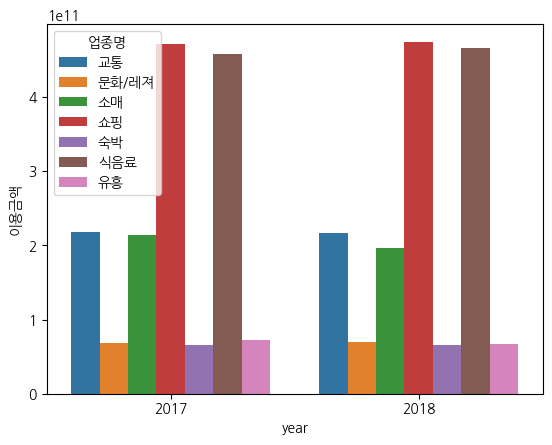

In [40]:
df['year'] = df['연월'].dt.year
df_y_i = df.groupby(['year', '업종명']).sum(numeric_only=True).reset_index()
df_y_i = df_y_i[df_y_i['year'] != 2016].reset_index(drop=True)

sns.barplot(data=df_y_i, x='year', y='이용금액', hue='업종명')
plt.show()

<Axes: xlabel='연령대', ylabel='이용금액'>

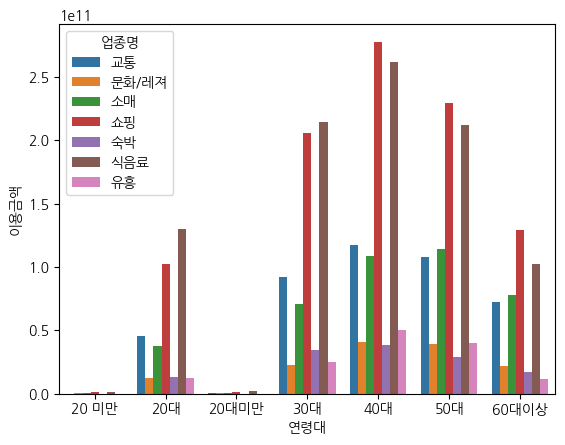

In [45]:
df_age_i = df.groupby(['연령대','업종명']).sum(numeric_only=True)
df_age_i.reset_index(inplace = True)
sns.barplot(data=df_age_i, x='연령대', y='이용금액', hue='업종명')

,연령대,업종명,이용자수,이용횟수,이용금액,year
0,20 미만,교통,1195,1682,107936155,123037
1,20 미만,문화/레져,16144,26399,306880283,316669
2,20 미만,소매,26396,37170,811433000,338856
3,20 미만,쇼핑,73304,201174,1362852190,354992
4,20 미만,숙박,921,1219,30230936,131105
5,20 미만,식음료,57946,113455,1554145924,354992
6,20 미만,유흥,749,964,40214200,60510
7,20대,교통,691799,832507,45278277733,774720
8,20대,문화/레져,450991,749958,12465321269,774720
9,20대,소매,832913,1125058,37445127141,774720
